# Genetic Matcher

The GeneticMatcher can be used to optimize any function of the baseline covariates, both linear and non-linear. In this demo notebook, we show how to call the matcher in the PyBalance library, including an example of a non-linear balance function.

In [1]:
import logging 
logging.basicConfig(
    format="%(levelname)-4s [%(filename)s:%(lineno)d] %(message)s",
    level='INFO',
)

from pybalance.sim import generate_toy_dataset
from pybalance.utils import (
    BetaBalance, 
    BetaSquaredBalance, 
    BetaXBalance,
    BetaMaxBalance,
    GammaBalance, 
    GammaSquaredBalance,
    GammaXBalance,
    GammaXTreeBalance,
    MatchingData
)
from pybalance.genetic import GeneticMatcher, get_global_defaults
from pybalance.visualization import (
    plot_numeric_features, 
    plot_categoric_features, 
    plot_binary_features,
    plot_per_feature_loss,
)

time_limit = 300

In [2]:
m = generate_toy_dataset()
m

,age,height,weight,gender,haircolor,country,population,binary_0,binary_1,binary_2,binary_3,patient_id
0,62.511573,190.229250,105.165097,0.0,2,3,pool,0,0,0,0,0
1,68.505065,161.121236,95.001474,0.0,1,1,pool,1,0,1,0,1
2,50.071384,162.325356,84.290576,1.0,0,5,pool,0,0,1,1,2
3,44.423692,150.948096,82.031381,1.0,2,2,pool,0,0,0,1,3
4,41.695052,132.952651,54.857540,0.0,1,3,pool,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,21.474205,168.602546,70.342128,0.0,2,5,target,0,0,0,1,10995
996,40.643320,188.188724,61.611744,0.0,2,4,target,1,0,0,1,10996
997,29.472765,161.408162,57.214095,0.0,0,1,target,0,1,1,1,10997
998,41.291949,150.968833,91.270798,0.0,0,3,target,0,0,0,0,10998


## Optimize Beta (Mean Absolute SMD)

In [3]:
objective = beta = BetaBalance(m)
matcher = matcher_beta = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [matcher.py:125] cpu


{'objective': 'beta',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [4]:
matcher_beta.match()

INFO [initialization.py:31] Optimizing balance with genetic algorithm ...
INFO [initialization.py:32] Initial balance scores:
INFO [initialization.py:37] 	beta:	0.233
INFO [initialization.py:38] Initializing candidate populations ...
INFO [initialization.py:86] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:180] Training model SGDClassifier (iter 1/50, 0.001 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: SGDClassifier
INFO [matcher.py:139] 	* alpha: 1.5074398973827774
INFO [matcher.py:139] 	* class_weight: None
INFO [matcher.py:139] 	* early_stopping: True
INFO [matcher.py:139] 	* fit_intercept: True
INFO [matcher.py:139] 	* loss: log_loss
INFO [matcher.py:139] 	* max_iter: 1500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:140] 	Score (beta): 0.0525
INFO [matcher.py:141] 	Solution time: 0.002 min
INFO [matcher.py:180] Training model LogisticRegression (iter 2/50, 0.002 min) ...
INFO [matcher.py:136] Best propensit

INFO [initialization.py:132] Sampling 512 candidate populations according to PROPENSITY distribution ...

INFO [initialization.py:132] Sampling 511 candidate populations according to UNIFORM distribution ...

INFO [logger.py:34] Generation 0
INFO [logger.py:35] 	remaining patients: 10000
INFO [logger.py:36] 	elapsed time: 0.31 min
INFO [logger.py:45] 	best beta: 0.02494 	worst beta: 0.25118
INFO [logger.py:34] Generation 1000
INFO [logger.py:35] 	remaining patients: 7451
INFO [logger.py:36] 	elapsed time: 4.36 min
INFO [logger.py:45] 	best beta: 0.01141 	worst beta: 0.24623
INFO [matcher.py:211] Time limit exceeded. Stopping.


,age,height,weight,gender,haircolor,country,population,binary_0,binary_1,binary_2,binary_3,patient_id
0,55.261578,139.396134,94.438359,0.0,2,2,target,0,0,1,1,10000
1,63.113091,165.563337,67.433016,1.0,2,2,target,0,1,1,0,10001
2,58.232216,160.859857,71.915385,1.0,0,2,target,0,0,0,0,10002
3,58.996941,140.357415,115.606615,1.0,0,3,target,1,1,0,0,10003
4,36.850195,189.983706,53.000581,0.0,2,5,target,0,0,0,0,10004
...,...,...,...,...,...,...,...,...,...,...,...,...
43,28.382714,155.203257,73.126127,0.0,2,5,pool,1,1,0,1,43
4050,44.186246,133.221816,97.047691,1.0,0,4,pool,0,0,0,1,4050
8313,46.510049,130.960298,88.501597,1.0,2,4,pool,0,0,1,0,8313
7166,57.061793,157.544063,70.784043,1.0,2,4,pool,0,1,0,1,7166


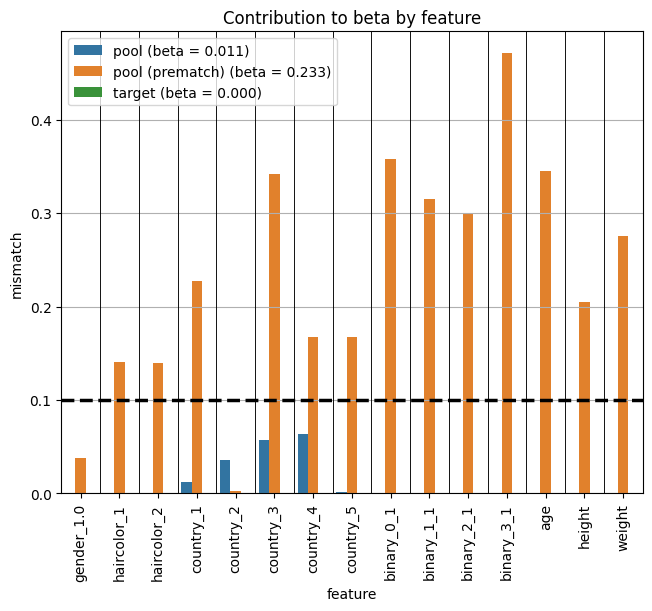

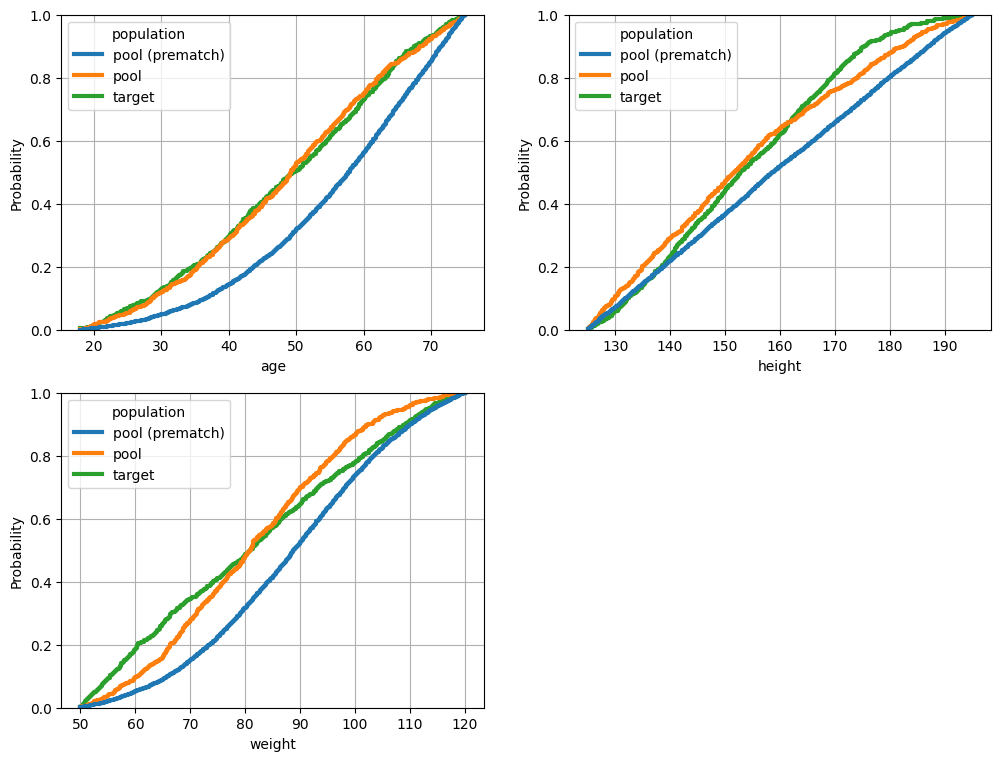

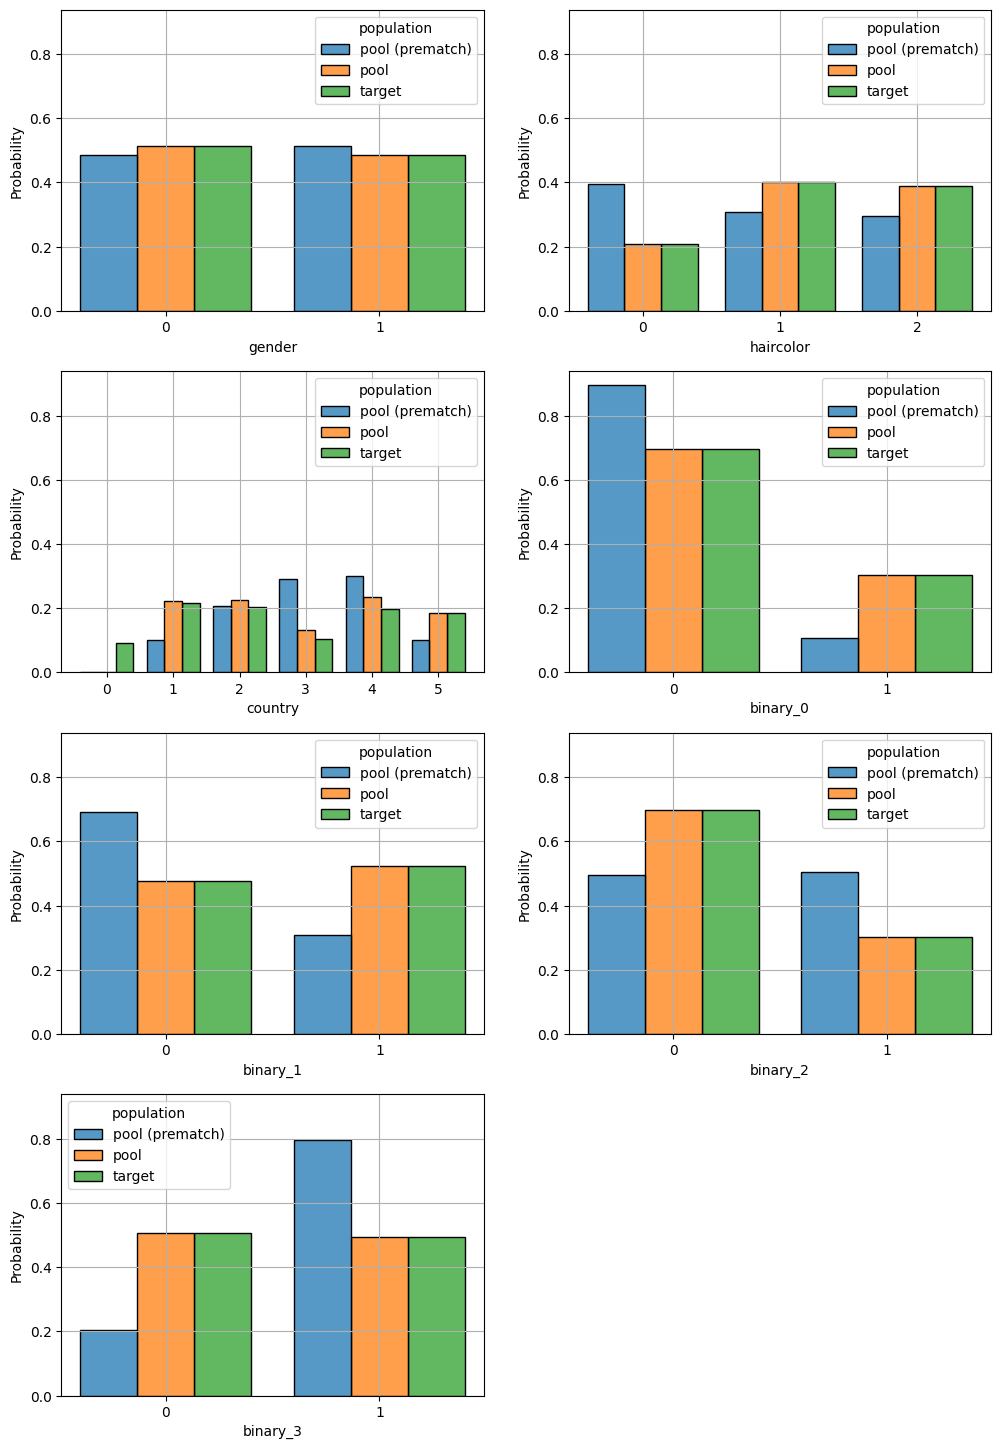

In [5]:
%matplotlib inline

match = matcher_beta.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])

## Optimize Beta^2

In [6]:
objective = beta2 = BetaSquaredBalance(m)
matcher = matcher_beta2 = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [matcher.py:125] cpu


{'objective': 'beta_squared',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [7]:
match = matcher.match()

INFO [initialization.py:31] Optimizing balance with genetic algorithm ...
INFO [initialization.py:32] Initial balance scores:
INFO [initialization.py:37] 	beta_squared:	0.263
INFO [initialization.py:38] Initializing candidate populations ...
INFO [initialization.py:86] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:180] Training model SGDClassifier (iter 1/50, 0.001 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: SGDClassifier
INFO [matcher.py:139] 	* alpha: 1.5074398973827774
INFO [matcher.py:139] 	* class_weight: None
INFO [matcher.py:139] 	* early_stopping: True
INFO [matcher.py:139] 	* fit_intercept: True
INFO [matcher.py:139] 	* loss: log_loss
INFO [matcher.py:139] 	* max_iter: 1500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:140] 	Score (beta_squared): 0.0603
INFO [matcher.py:141] 	Solution time: 0.004 min
INFO [matcher.py:180] Training model LogisticRegression (iter 2/50, 0.004 min) ...
INFO [matcher.py:136

INFO [initialization.py:66] 	beta_squared:	0.031
INFO [initialization.py:71] 	Included in initial population.

INFO [initialization.py:132] Sampling 512 candidate populations according to PROPENSITY distribution ...

INFO [initialization.py:132] Sampling 511 candidate populations according to UNIFORM distribution ...

INFO [logger.py:34] Generation 0
INFO [logger.py:35] 	remaining patients: 10000
INFO [logger.py:36] 	elapsed time: 0.51 min
INFO [logger.py:45] 	best beta_squared: 0.03106 	worst beta_squared: 0.28163
INFO [matcher.py:211] Time limit exceeded. Stopping.


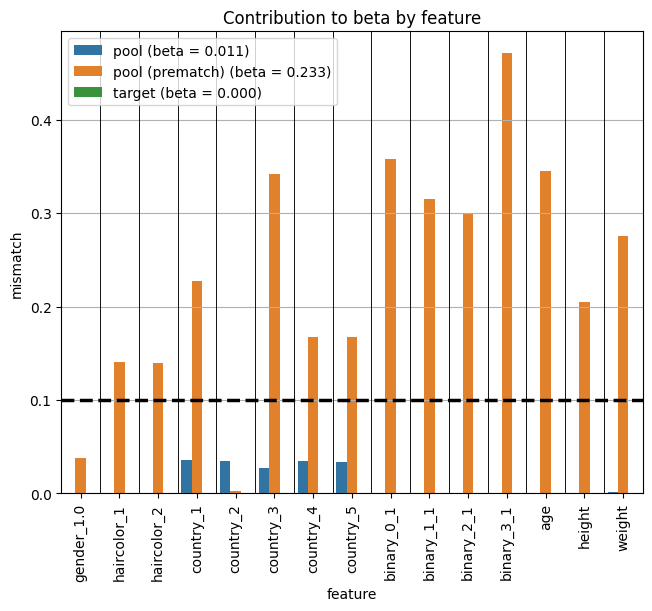

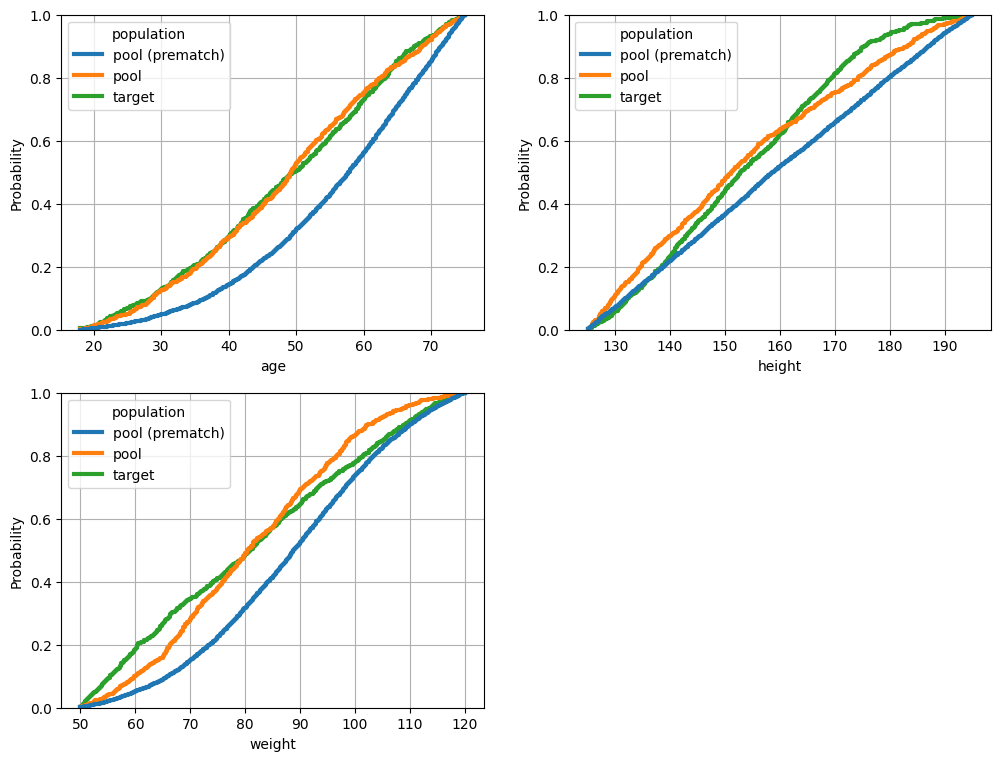

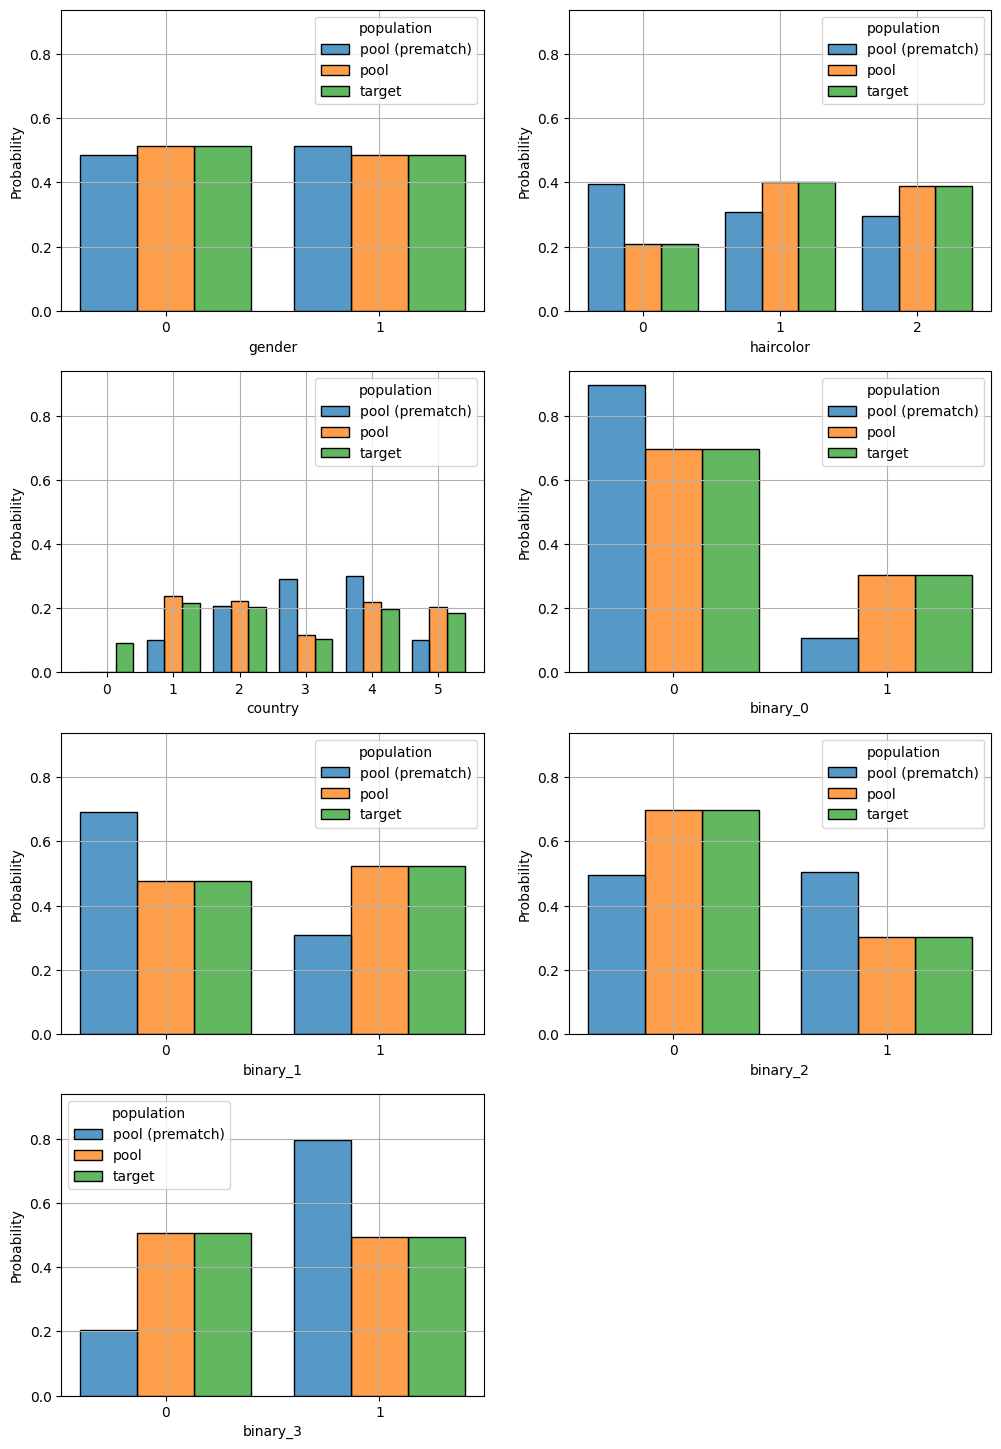

In [8]:
%matplotlib inline

match = matcher_beta2.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])

## Optimize Gamma (Area Between CDFs)

In [9]:
objective = gamma = GammaBalance(m, feature_weights={'age':2})
matcher = matcher_gamma = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [preprocess.py:335] Discretized age with bins [18.05, 27.54, 37.04, 46.53, 56.02, 65.51, 75.0].
INFO [preprocess.py:335] Discretized height with bins [125.01, 136.68, 148.34, 160.01, 171.67, 183.34, 195.0].
INFO [preprocess.py:335] Discretized weight with bins [50.0, 61.67, 73.33, 85.0, 96.66, 108.33, 120.0].
INFO [matcher.py:125] cpu


{'objective': 'gamma',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [10]:
match = matcher.match()

INFO [initialization.py:31] Optimizing balance with genetic algorithm ...
INFO [initialization.py:32] Initial balance scores:
INFO [initialization.py:37] 	gamma:	0.217
INFO [initialization.py:38] Initializing candidate populations ...
INFO [initialization.py:86] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:180] Training model SGDClassifier (iter 1/50, 0.001 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: SGDClassifier
INFO [matcher.py:139] 	* alpha: 1.5074398973827774
INFO [matcher.py:139] 	* class_weight: None
INFO [matcher.py:139] 	* early_stopping: True
INFO [matcher.py:139] 	* fit_intercept: True
INFO [matcher.py:139] 	* loss: log_loss
INFO [matcher.py:139] 	* max_iter: 1500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:140] 	Score (gamma): 0.1083
INFO [matcher.py:141] 	Solution time: 0.004 min
INFO [matcher.py:180] Training model LogisticRegression (iter 2/50, 0.004 min) ...
INFO [matcher.py:136] Best propens

/Users/sprivite/src/pybalance/venv/pybalance/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
INFO [matcher.py:180] Training model SGDClassifier (iter 48/50, 0.524 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 49/50, 0.526 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 50/50, 0.528 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: LogisticRegression
INFO [matcher.py:139] 	* C: 13.179630432958701
INFO [matcher.py:139] 	* fit_intercept: False
INFO [matcher.py:139] 	* max_iter: 500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:139] 	* solver: saga
INFO [matcher.py:140] 	Score (gamma): 0.0269
INFO [matcher.py:141] 	Solution time: 0.135 min
INFO [initialization.py:66] 	gamma:	0.027
INFO [initialization.py:71] 	Included in initial population.

INFO [initialization.py:132] Sampling 51

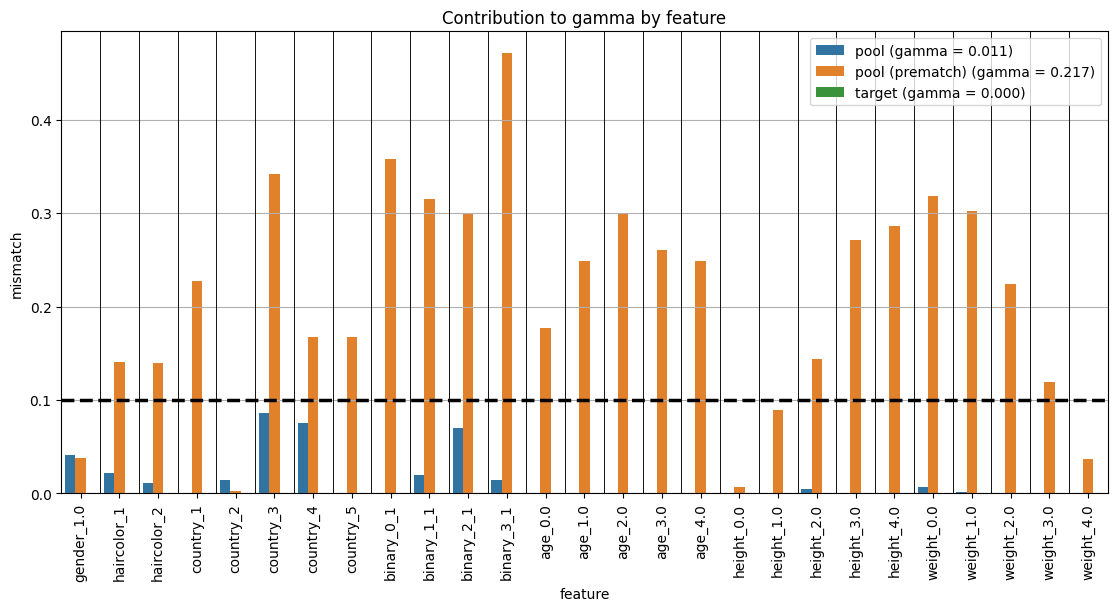

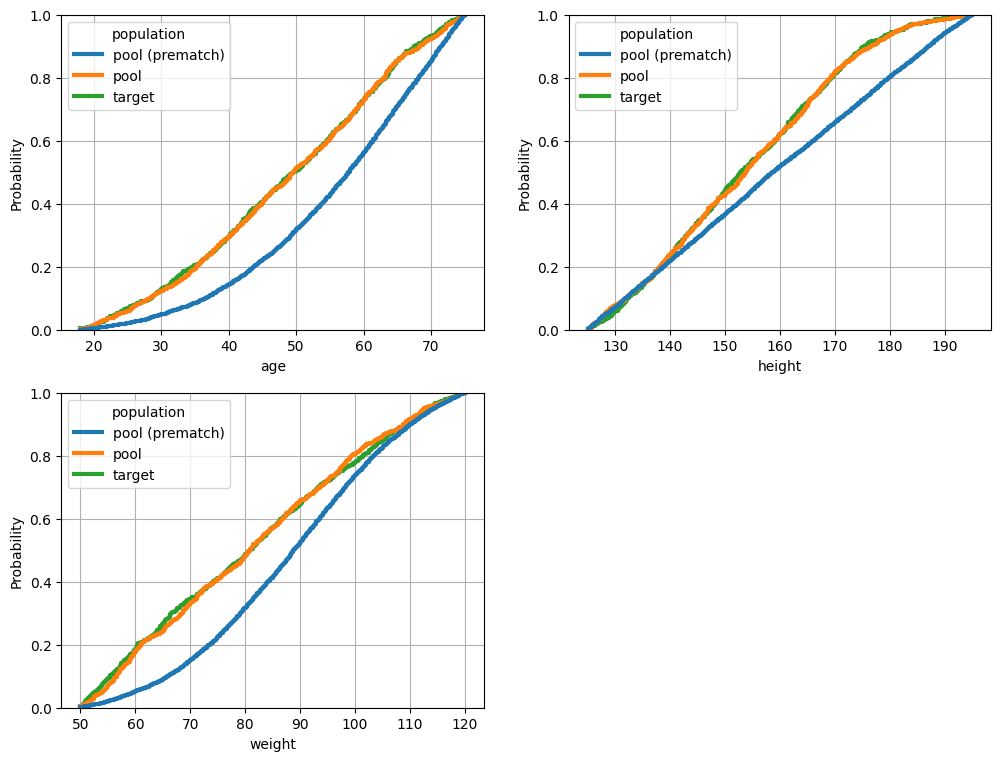

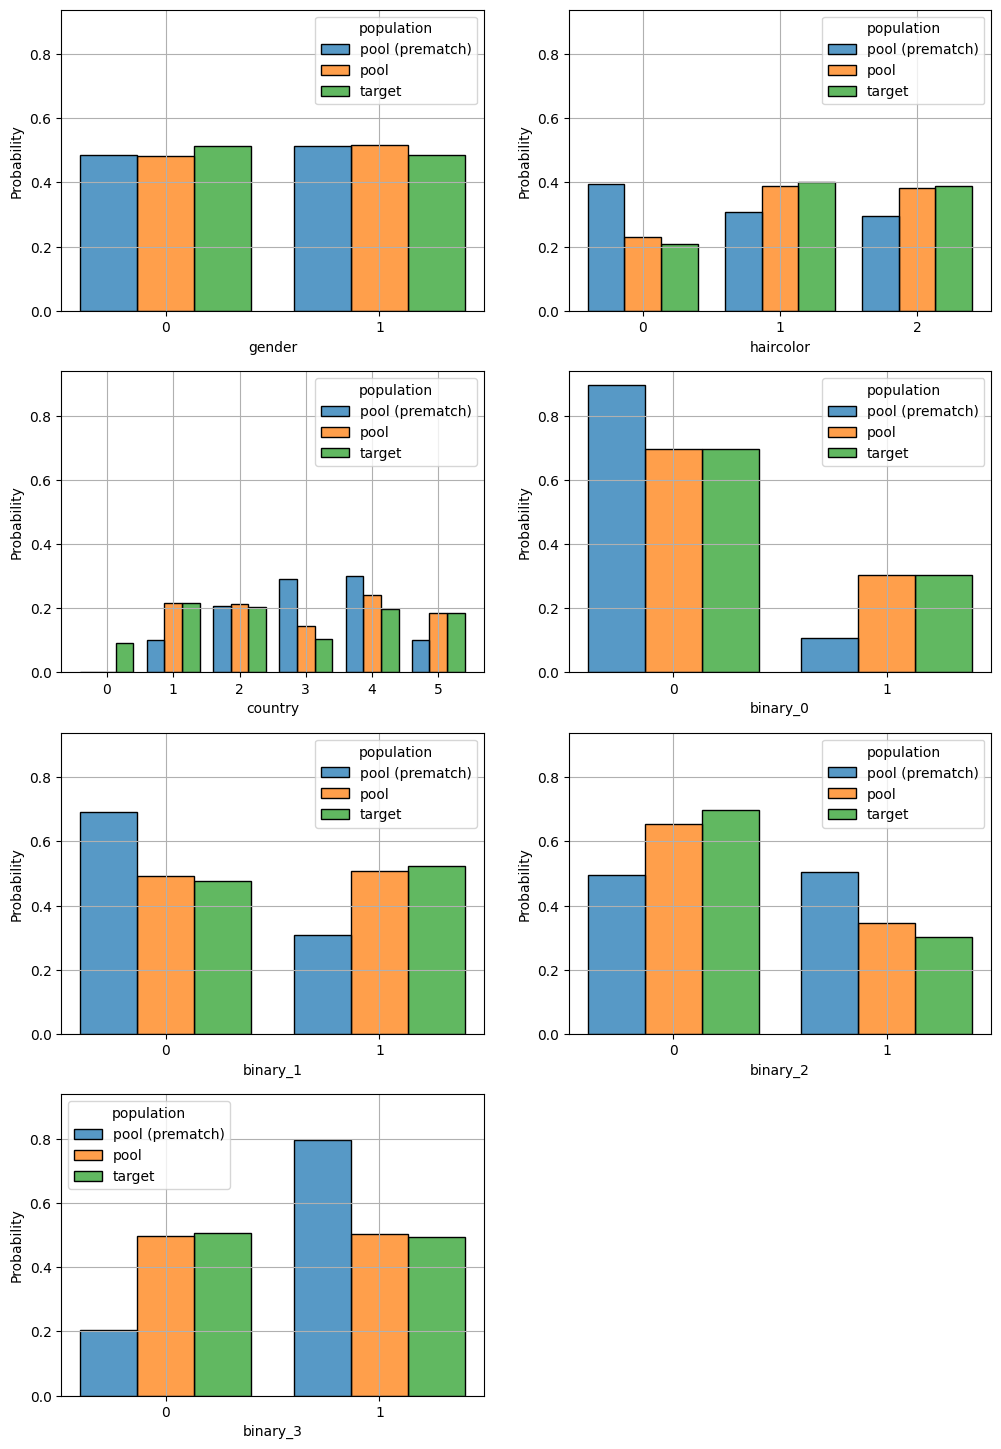

In [11]:
%matplotlib inline

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, gamma, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])